<a href="https://colab.research.google.com/github/sowmya-cyber/MLABS/blob/main/MLABsios_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler





In [ ]:
#mounting
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# loading the dataset
data= torch.load("/content/gdrive/MyDrive/ex_dataset (1).pkl")

In [ ]:
data= data.numpy()

In [ ]:
#handling missing information by using mean imputation
print(data.shape)
npdata=data==-100

non_zero_values = data[npdata != 0]
mean_value = np.mean(non_zero_values)
data[npdata]=mean_value

(50, 50)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-39-fcecca295821>:6: RuntimeWarning: invalid value encountered in cast
  data[npdata]=mean_value


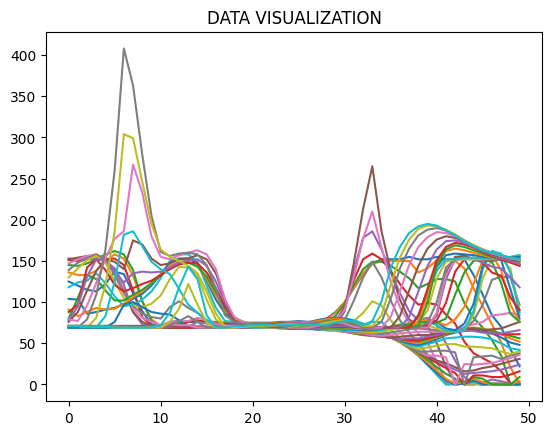

In [ ]:
#Data visualization-Understanding of data
plt.plot(data)
plt.title('DATA VISUALIZATION')
plt.show()

In [ ]:
# Normalize the data using min-max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(data.shape)


In [ ]:
#splitting of training and testing of data (80:20 ratio)
np.random.seed(42)
indices = np.random.permutation(data.size)
train_indices, test_indices = indices[:int(0.8*len(indices))], indices[int(0.8*len(indices)):]


In [ ]:
#reshaping the dat
train_data = data.flatten()[train_indices]
test_data =  data.flatten()[test_indices]


In [ ]:
X_train = np.vstack((np.arange(train_data.size), np.ones(train_data.size))).T
X_test = np.vstack((np.arange(test_data.size), np.ones(test_data.size))).T

In [ ]:
import torch
import numpy

In [ ]:
#fit for least square regresson and preicting the output
X_train = torch.tensor(X_train, dtype=torch.float32)
train_data = torch.tensor(train_data, dtype=torch.float32)

theta, _, _, _ = numpy.linalg.lstsq(X_train, train_data)
y_pred_linear = X_test @ theta


<ipython-input-58-1d3ceea16c2c>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta, _, _, _ = numpy.linalg.lstsq(X_train, train_data)


In [ ]:
#Function for radial basis function
def rbf(x, centers, width):
    distances = torch.sum((x - centers.unsqueeze(0)) ** 2, dim=2)  # Compute distances along the third dimension
    return torch.exp(-distances / (2 * width**2))


In [ ]:
  #transform data for RBF
  def calculate_design_matrixes(X, centers, width):
    X_tensor = torch.tensor(X)
    # Compute the RBF design matrix
    design_matrix = rbf(X_tensor.unsqueeze(1), centers, width)

    # Concatenate a column of ones to the design matrix
    ones_column = torch.ones((X_tensor.shape[0], 1))
    design_matrix_with_ones = torch.hstack([ones_column, design_matrix])

    return design_matrix_with_ones

In [ ]:
# Compute centers for RBFs
num_centers = 10
centers = X_train[np.linspace(0, len(X_train)-1, num_centers, dtype=int)]
print (centers)

tensor([[0.0000e+00, 1.0000e+00],
        [2.2200e+02, 1.0000e+00],
        [4.4400e+02, 1.0000e+00],
        [6.6600e+02, 1.0000e+00],
        [8.8800e+02, 1.0000e+00],
        [1.1100e+03, 1.0000e+00],
        [1.3320e+03, 1.0000e+00],
        [1.5540e+03, 1.0000e+00],
        [1.7760e+03, 1.0000e+00],
        [1.9990e+03, 1.0000e+00]])


In [ ]:
# iterate over 7 random basic functions and predict the otput(MEAN SQUARE ERROR)
num_centers_list = [10, 15, 20, 25, 30,35,40]
mse_listr = []
mse_list1=[]
for num_centers in num_centers_list:
    num_centers = 10
    centers = X_train[np.linspace(0, len(X_train)-1, num_centers, dtype=int)]
    X_train_rbf = calculate_design_matrixes(X_train, centers, width=0.1)
    X_test_rbf = calculate_design_matrixes(X_test, centers, width=0.1)
    theta_rbf, _, _, _ = numpy.linalg.lstsq(X_train_rbf, torch.tensor(train_data))
    y_pred_rbf = X_test_rbf @ theta_rbf
    mse_linear = ((test_data - y_pred_linear)**2).mean()
    mse_rbf = ((test_data - y_pred_rbf.numpy())**2).mean()
    mse_listr.append(mse_rbf)
    mse_list1.append(mse_linear)
    print(mse_listr)
    print(mse_list1)


[0.01089891583757269]
[0.010742544960379867]
[0.01089891583757269, 0.01089891583757269]
[0.010742544960379867, 0.010742544960379867]
[0.01089891583757269, 0.01089891583757269, 0.01089891583757269]
[0.010742544960379867, 0.010742544960379867, 0.010742544960379867]
[0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269]
[0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867]
[0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269]
[0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867]
[0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269]
[0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867, 0.010742544960379867]
[0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 0.01089891583757269, 

<ipython-input-60-40679a7da107>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X)
<ipython-input-65-27823b316ce0>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_rbf, _, _, _ = numpy.linalg.lstsq(X_train_rbf, torch.tensor(train_data))
<ipython-input-65-27823b316ce0>:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_rbf, _, _, _ = numpy.linalg.lstsq(X_train_rbf, torch.tensor(train_data))


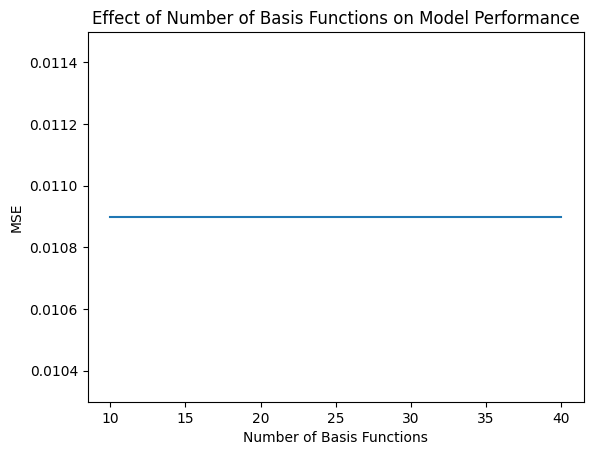

In [ ]:
plt.plot(num_centers_list, mse_listr)
plt.xlabel('Number of Basis Functions')
plt.ylabel('MSE')
plt.title('Effect of Number of Basis Functions on Model Performance')
plt.show()